In [2]:
import sys

In [20]:
%load_ext autoreload

%autoreload 2

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import data

In [88]:
claims_df = pd.read_csv('C:/Users/Ali/Documents/CIBC/claims_final.csv', header=None, names=['family_id','member_id', 'provider_id', 'provider_type', 'state', 'date', 'procedure', 'amount'])

In [89]:
claims = claims_df.to_records(index=False)

In [90]:
provider_types = np.unique(claims['provider_type'])

In [91]:
claims_pt0 = data.subset_query(claims, lambda item: item['provider_type'] == provider_types[0])

## Provider Type 0: Feature Extraction

Raw features:
* `overcharge`: difference between total amount and the total amount an average provider would have charged for same procedures (5)
* `visits_per_patient`: number of visits per patient (avg, std) (4)
* `n_cases`: number of cases (1)
* `fees_per_patient`: fees per patient (avg, std) (3)
* `total_fees`: total fees

In [92]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [188]:
import features

In [189]:
list_features = ['overcharge', 'visits_per_patient_avg', 'visits_per_patient_std', 'n_cases', 'fees_per_patient_avg','fees_per_patient_std', 'total_fees']

In [191]:
n_cases = 10000
n_features = len(list_features)

In [192]:
subset_claims = np.random.choice(claims_pt0, size=n_cases)

In [193]:
X = np.empty((n_cases, n_features), dtype=np.float32)

In [196]:
oc, fees = features.compute_overcharge_and_fees(subset_claims)
n_cases = features.compute_cases(subset_claims)

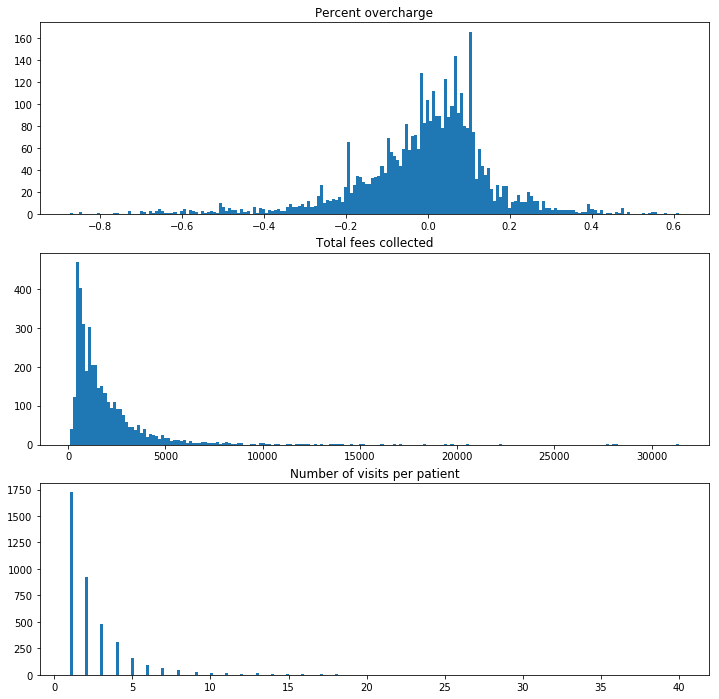

In [230]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
ax[0].set_title('Percent overcharge')
ax[0].hist(oc.values(), bins=200);
ax[1].set_title('Total fees collected')
ax[1].hist(fees.values(),bins=200);
ax[2].set_title('Number of visits per patient')
ax[2].hist(n_cases.values(),bins=200);

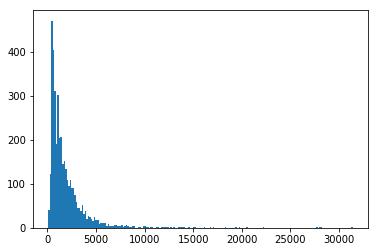

In [211]:
np.std(list(oc.values()))

0.16757274716434714

In [209]:
list(oc.values())[0]

0.19294345892572928

In [184]:
np.mean(np.asarray(oc.items()))

TypeError: unsupported operand type(s) for /: 'dict_items' and 'int'

In [118]:
def compute_overcharge_and_fees(claims):
    average_proc_price = data.average(claims, 'procedure', 'amount')
    split_by_provider = data.split_by(claims, 'provider_id')
    oc = {}
    fees = {}
    for provider in split_by_provider.keys():
        fees[provider] = split_by_provider[provider]['amount'].sum()
        average_price = 0
        for case in split_by_provider[provider]:
            average_price += average_proc_price[case['procedure']]['avg']
        oc[provider] = (fees[provider] - average_price)*1.0/average_price
    return oc, fees
    